In [1]:
%load_ext autoreload
%autoreload 2


%matplotlib inline

In [2]:
%cd C:\MAD4AG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\MAD4AG


In [3]:
filename = r'.\dbs\twins\run-evaluate.pkl'


df_twins=  pd.read_pickle(filename)

df_survey_twins = pd.read_pickle(f'./dbs/intermediate/df_survey_twins.pkl')

In [4]:
print('The share of the matched survey ppl: ', np.round(len(df_twins.sub_id.unique())/len(df_survey_twins.sub_id.unique()),2))

The share of the matched survey ppl:  0.95


In [5]:
print('Repetition number of 10 most matched people \n', df_twins.sub_id.value_counts().head(10))

Repetition number of 10 most matched people 
 20110931074    196
20142021076    195
20135211019    195
20111611003    194
20124851036    194
20111541082    190
20112511002    189
20142641064    189
20112221001    185
20112621014    184
Name: sub_id, dtype: int64


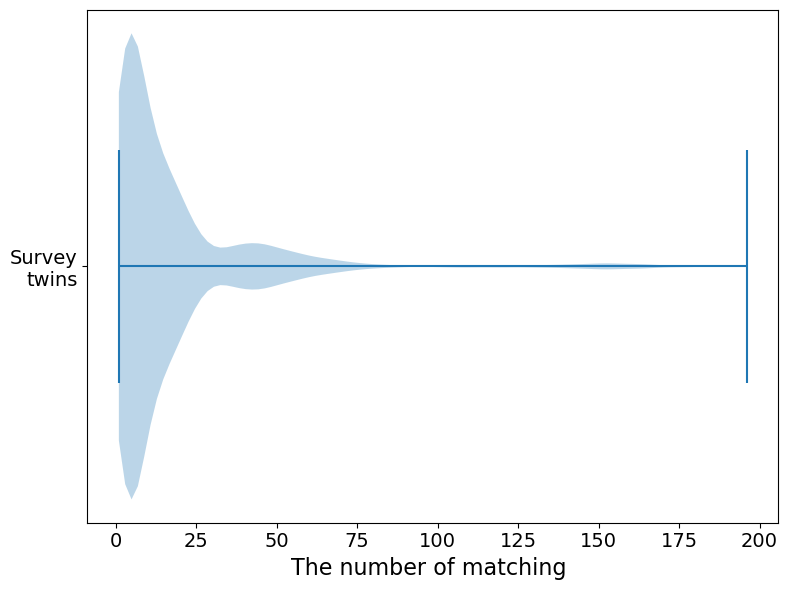

In [24]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))


ax1.violinplot(df_twins.sub_id.value_counts(), vert=False)
#ax1.set_title('The number of matching ', fontsize=14)
ax1.set_yticks([1], labels=['Survey\ntwins'], fontsize=14)
ax1.set_xticks(range(0,225,25),range(0,225,25), fontsize=14)
# # #
# # ax1.set_xticklabels(range(-500, 2501, 500), fontsize=12)
# # ax1.set_ylabel('Urban density levels', fontsize=14)
ax1.set_xlabel('The number of matching ', fontsize=16)
# #
# fig.suptitle('The distance distribution between Home and Work/School' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/survey_ppl_repetition_number.png")
plt.show()

## Evaluation of act seq

In [6]:
seq_hist = df_survey_twins.act_seq_simp.value_counts(normalize=True).reset_index(name='share_survey').sort_values(by='share_survey', ascending=False)

mad_seq_hist= df_twins.groupby('act_seq_simp')['wt'].sum()/df_twins['wt'].sum()
mad_seq_hist= mad_seq_hist.reset_index(name='share_mad')
#aac['act_uniq']= aac['act_uniq'].astype(str)

seq_hist = pd.merge(seq_hist,mad_seq_hist, left_on='index', right_on='act_seq_simp')

seq_hist.drop(columns=['act_seq_simp'], inplace=True)

In [7]:
seq_hist['index']= seq_hist['index'].astype(str)

seq_hist['index']= seq_hist['index'].str.replace('Home','H')
seq_hist['index']= seq_hist['index'].str.replace('Work','W')
seq_hist['index']= seq_hist['index'].str.replace('Other','O')
seq_hist['index']= seq_hist['index'].str.replace('School','S')
seq_hist['index']= seq_hist['index'].str.replace(',','-')
seq_hist['index']= seq_hist['index'].str.replace('["\']','')
seq_hist['index']= seq_hist['index'].str.replace('(','')
seq_hist['index']= seq_hist['index'].str.replace(')','')
seq_hist['index']= seq_hist['index'].str.replace(' ','')

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [8]:
seq_hist

,index,share_survey,share_mad
0,H-O-H,0.220206,0.213605
1,H-W-H,0.217383,0.223540
2,H-O-H-O-H,0.059219,0.059919
3,H-O-O-H,0.057740,0.058116
4,H-W-O-H,0.051422,0.051359
...,...,...,...
498,H-O-O-H-O-O-O-H-O-W-H,0.000067,0.000072
499,H-W-H-O-O-O-H-O-H,0.000067,0.000038
500,H-O-O-O-H-W-H,0.000067,0.000063
501,H-O-O-H-W-O-O-H,0.000067,0.000042


In [9]:
from scipy.spatial import distance

print("Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.")
distance = np.round(distance.jensenshannon(seq_hist.iloc[:, 1], seq_hist.iloc[:, 2]),4)

print("Jensen-Shannon distance:", distance)


Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.
Jensen-Shannon distance: 0.0313


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


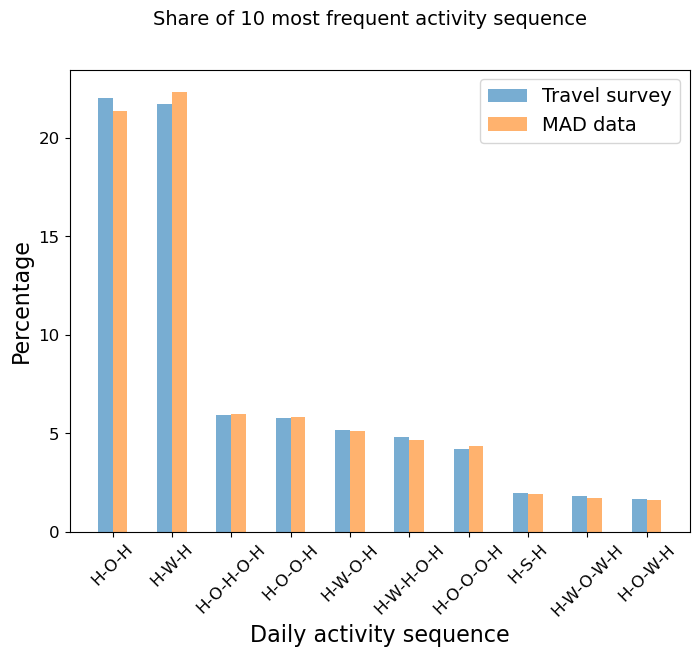

In [13]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

X = np.arange(10)

ax0.bar(X- 0.125, seq_hist.iloc[:10, 1], width = 0.25, alpha=0.6, label='Travel survey')
ax0.bar(X+ 0.125, seq_hist.iloc[:10, 2], width = 0.25, alpha=0.6, label='MAD data')
# ax0.grid(visible=False)
#
ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Daily activity sequence', fontsize=16)
ax0.set_xticks(range(0,10),seq_hist.iloc[:10, 0], fontsize=12, rotation=45)
ax0.set_yticklabels(range(0, 25, 5), fontsize=12)
ax0.set_ylabel('Percentage', fontsize=16)


fig.suptitle('Share of 10 most frequent activity sequence' , fontsize=14)
#fig.tight_layout()
plt.savefig("./figures/most_frequent_activity_sequence.jpg")
#plt.show()


In [153]:
import os
# List the CSV files in the directory
directory = r'.\dbs\twins'
csv_files = [file for file in os.listdir(directory) if file.endswith('-day.pkl')]

In [154]:
csv_files

['run-1-day.pkl',
 'run-2-day.pkl',
 'run-3-day.pkl',
 'run-4-day.pkl',
 'run-5-day.pkl']

In [145]:
count = 0

# Loop through each CSV file and combine the data
for file in csv_files:
    # Read the CSV file into a DataFrame
    if count==0:
        combined_df = pd.read_pickle(os.path.join(directory, file))
        combined_df.rename(columns={'act_uniq':'act_uniq_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
    else:
        new_seq = pd.read_pickle(os.path.join(directory, file))
        new_seq.rename(columns={'act_uniq':'act_uniq_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
        combined_df = pd.merge(combined_df, new_seq[['uid','act_uniq_'+str(count),'sub_id_'+str(count)]], on='uid', how='left')
    count+=1





In [146]:
combined_df.columns

Index(['uid', 'employee', 'Deso', 'county', 'urban_density', 'other_count',
       'avg_dist', 'com_dist', 'wt', 'wt_p', 'region', 'avg_dist_cat',
       'stratum', 'sub_id_0', 'act_seq', 'act_uniq_0', 'avg_dist', 'commute',
       'other_count_seq', 'act_uniq_1', 'sub_id_1', 'act_uniq_2', 'sub_id_2',
       'act_uniq_3', 'sub_id_3', 'act_uniq_4', 'sub_id_4'],
      dtype='object')

In [156]:
unique_sub_id = combined_df[['sub_id_0','sub_id_1','sub_id_2','sub_id_3','sub_id_4']].stack().groupby(level=0).apply(lambda x: x.unique().tolist())

In [157]:
unique_sub_id = unique_sub_id.reset_index(name='unique_sub_id')

In [ ]:
unique_sub_id['unique_sub_id']

In [160]:
combined_df['sub_ids']= combined_df[['sub_id_0','sub_id_1','sub_id_2','sub_id_3','sub_id_4']].values.tolist()

In [161]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)

# Apply the function to each row in the specified column
combined_df['unique_sub_id'] = combined_df['sub_ids'].apply(calculate_list_length)

<AxesSubplot:>

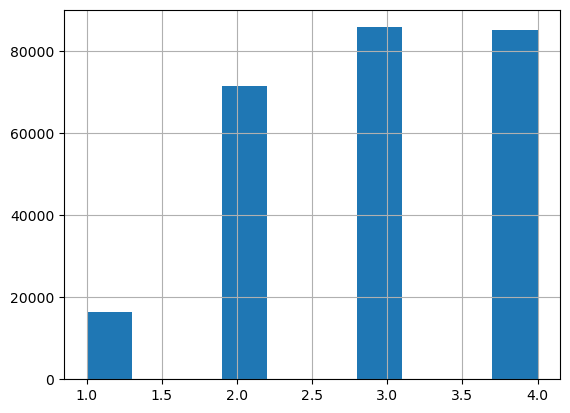

In [166]:
combined_df['unique_sub_id'].hist()

In [162]:
combined_df['act_seqs'] = combined_df[['act_uniq_0', 'act_uniq_1', 'act_uniq_2', 'act_uniq_3', 'act_uniq_4']].values.tolist()


In [163]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)


# Apply the function to each row in the specified column
combined_df['unique_act_seq'] = combined_df['act_seqs'].apply(calculate_list_length)

<AxesSubplot:>

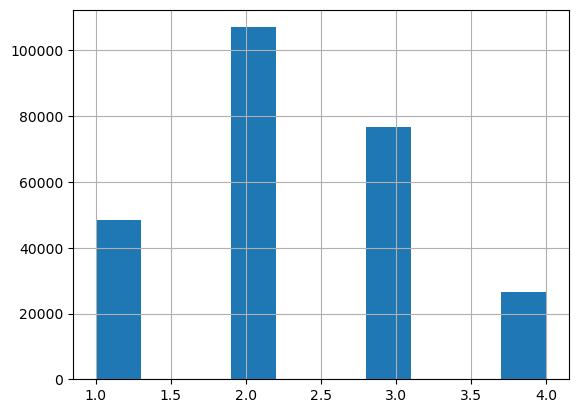

In [165]:
combined_df['unique_act_seq'].hist()